Exercise (Normal Distribution and Z Score for Outlier Removal)
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

1)Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
2)After removing outliers in step 1, you get a new dataframe.
3)On step(2) dataframe, use 4 standard deviation to remove outliers
4)Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
5)On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [30]:
import pandas as pd
import seaborn as sn

In [3]:
df=pd.read_csv("bhp.csv")

In [4]:
df.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.info()
#conclusion total 7 columns
#13200 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [6]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [11]:
#no null values
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

From above we can see that there are no missing (NULL) values in the dataset

In [13]:
#getting information on "price_per_sqft" column
df["price_per_sqft"].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [48]:
print("*** df dataframe ***")
print("------------")
print("max price_per_sqft value",df["price_per_sqft"].max())
print("min price_per_sqft value:",df["price_per_sqft"].min())
print("mean price_per_sqft value:",df["price_per_sqft"].mean())
print("Standard deviation price_per_sqft value:",df["price_per_sqft"].mean())

*** df dataframe ***
------------
max price_per_sqft value 12000000
min price_per_sqft value: 267
mean price_per_sqft value: 7920.336742424242
Standard deviation price_per_sqft value: 7920.336742424242


In [15]:
mean_price_per_sqft=df["price_per_sqft"].mean()
mean_price_per_sqft

7920.336742424242

1)Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [20]:
Q_001=df["price_per_sqft"].quantile(0.001)
Q_999=df["price_per_sqft"].quantile(0.999)
print("price_per_sqft 0.001 percentile: ",Q_001,"price_per_sqft 0.999 percentile: ",Q_999)

price_per_sqft 0.001 percentile:  1366.184 price_per_sqft 0.999 percentile:  50959.36200000098


In [24]:
df_1=df[(df["price_per_sqft"]>Q_001) & (df["price_per_sqft"]<Q_999)]
df_1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [28]:
# showing count for outliers
Total_df_count=df["price_per_sqft"].count()#total rows in orignal dataframe:
print("count of rows before removing outliers:",Total_df_count)
new_df_1_count=df_1["price_per_sqft"].count() #
print("count of rows after removing outliers:",new_df_1_count)
total_outliers_removed=Total_df_count-new_df_1_count
print("count of outliers rows :",total_outliers_removed)

count of rows before removing outliers: 13200
count of rows after removing outliers: 13172
count of outliers rows : 28


2)After removing outliers in step 1, you get a new dataframe.

In [32]:
df_1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

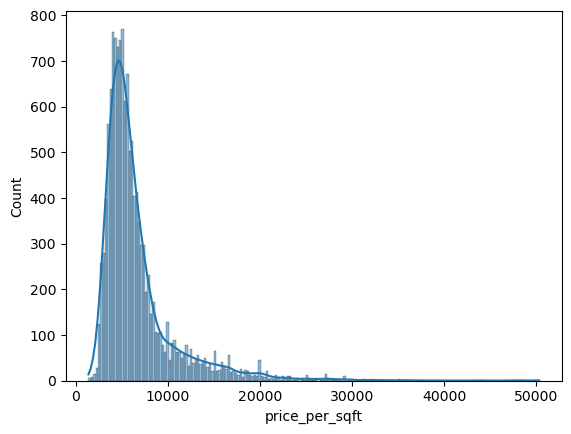

In [37]:
#printing histogram for 
sn.histplot(df_1["price_per_sqft"],kde=True)

3)On step(2) dataframe, use 4 standard deviation to remove outliers

In [49]:
print("df_1 Dataframe")
print("---------------")
mean_df_1=df_1["price_per_sqft"].mean()
print("mean/avg of price_per_sqft from df_1 dataframe:",df_1["price_per_sqft"].mean())
print("max price_per_sqft from df_1 dataframe:",df_1["price_per_sqft"].max())
print("min price_per_sqft from df_1 dataframe:",df_1["price_per_sqft"].min())
df_1_standard_deviation=df_1["price_per_sqft"].std()
print("Standard deviation for df_1 dataframe:",df_1_standard_deviation)

df_1 Dataframe
---------------
mean/avg of price_per_sqft from df_1 dataframe: 6663.6537351958705
max price_per_sqft from df_1 dataframe: 50349
min price_per_sqft from df_1 dataframe: 1379
Standard deviation for df_1 dataframe: 4141.020700174605


In [50]:
upper_limit=mean_df_1+4*df_1_standard_deviation
lower_limit=mean_df_1-4*df_1_standard_deviation
df_2=df_1[(df_1["price_per_sqft"]>lower_limit) & (df_1["price_per_sqft"]<upper_limit)]
#df_1[(df_1["price_per_sqft"]>4*df_1_standard_deviation) & (df_1["price_per_sqft"]<4*df_1_standard_deviation)]

In [51]:
#dataframe after filtering df_1 dataframe 
df_2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [52]:
print("df_@ Dataframe")
print("---------------")
mean_df_2=df_2["price_per_sqft"].mean()
print("mean/avg of price_per_sqft from df_2 dataframe:",df_2["price_per_sqft"].mean())
print("max price_per_sqft from df_2 dataframe:",df_2["price_per_sqft"].max())
print("min price_per_sqft from df_2 dataframe:",df_2["price_per_sqft"].min())
df_2_standard_deviation=df_2["price_per_sqft"].std()
print("Standard deviation for df_2 dataframe:",df_2_standard_deviation)

df_@ Dataframe
---------------
mean/avg of price_per_sqft from df_2 dataframe: 6449.328044761248
max price_per_sqft from df_2 dataframe: 23214
min price_per_sqft from df_2 dataframe: 1379
Standard deviation for df_2 dataframe: 3487.6700047355853


4)Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

<Axes: xlabel='price_per_sqft', ylabel='Count'>

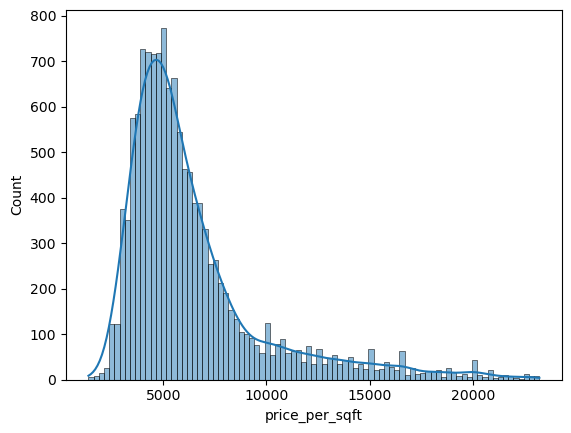

In [53]:
#printing histogram for df_2 dataframe
sn.histplot(df_2["price_per_sqft"],kde=True)

5)On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [56]:
mean_df_1=df_1["price_per_sqft"].mean()

#creating a column "Zsore" and storing calculated Z score value 
df_1["Zscore"]=(df_1["price_per_sqft"]-mean_df_1)/df_1["price_per_sqft"].std()

C:\Users\samir\AppData\Local\Temp\ipykernel_3100\654308056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Zscore"]=(df_1["price_per_sqft"]-mean_df_1)/df_1["price_per_sqft"].std()


In [57]:
df_1

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [58]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13172 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13172 non-null  object 
 1   size            13172 non-null  object 
 2   total_sqft      13172 non-null  float64
 3   bath            13172 non-null  float64
 4   price           13172 non-null  float64
 5   bhk             13172 non-null  int64  
 6   price_per_sqft  13172 non-null  int64  
 7   Zscore          13172 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 926.2+ KB


In [61]:
#using Z score to remove outliers
df_3=df_1[(df_1["Zscore"]>-4) & (df_1["Zscore"]<4)]

In [62]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13047 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13047 non-null  object 
 1   size            13047 non-null  object 
 2   total_sqft      13047 non-null  float64
 3   bath            13047 non-null  float64
 4   price           13047 non-null  float64
 5   bhk             13047 non-null  int64  
 6   price_per_sqft  13047 non-null  int64  
 7   Zscore          13047 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 917.4+ KB


In [63]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13047 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13047 non-null  object 
 1   size            13047 non-null  object 
 2   total_sqft      13047 non-null  float64
 3   bath            13047 non-null  float64
 4   price           13047 non-null  float64
 5   bhk             13047 non-null  int64  
 6   price_per_sqft  13047 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 815.4+ KB


In [67]:
print("total rows in df_2 dataframe which was filtered using Standard distribution",len(df_2["price_per_sqft"]))
print("total rows in df_2 dataframe which was filtered using Zscore distribution",len(df_3["price_per_sqft"]))


total rows in df_2 dataframe which was filtered using Standard distribution 13047
total rows in df_2 dataframe which was filtered using Zscore distribution 13047


We can conclude that data filtered using Standard distribution and Zscore distribution is same